# Exercise 4: Learning with a Multilayer Perceptron (MLP)
In this exercise, we will study a multilayer perceptron (MLP) with one hidden layer (comprising $M$ hidden neurons) and a single output neuron.

We obtain the output of the MLP through forward propagation as follows:

$$
\begin{align}
    \vec{v} &= \sigma_{\beta} \left( \vec{\tilde{x}} {W^{\text{hidden}}}  \right) \\
    y &= \sigma_{\beta} \left( \vec{\tilde{v}} \vec{\tilde{w}}^{\text{output}} \right)
\end{align}
$$

where $\vec{\tilde{x}} = \left(-1, x_1, ..., x_N \right)$ is the extended `sample` $\vec{x}$, $W^{\text{hidden}}=(\vec{\tilde{w}}^{T}_{1}, \dots, \vec{\tilde{w}}^{T}_{M})$ are the threshold extended `hidden_weights` of the hidden neurons, $\vec{v} = \left( v_1, \dots, v_M \right)$ are the $M$ outputs of the hidden neurons, $\vec{\tilde{v}} = \left(-1, v_1,..., v_M \right)$ is the extended hidden layer output vector, $\vec{\tilde{w}}^{\text{output}} = \left(\theta, w_1, \dots, w_M \right)$ are the threshold extended `output_weights` of the output neuron, and $\sigma_{\beta} \left(\cdot\right) = \text{tanh}\left(\frac{\beta}{2}\cdot\right)$ is the `sigmoid` function.

__Note__: The _threshold trick_ is applied, i.e. the threshold of each neuron is included as an additional _first_ component for each extended weight vector.

## Exercise 4.1: Implementation of the Backpropagation Algorithm
Now we want to learn the `hidden_weights` $W^\text{hidden}$ and the `output_weights` $\vec{\tilde{w}}^{\text{output}}$ from training data. The backpropagation rule (assuming that $\beta=2$, i.e. $\sigma_2\left(\cdot\right)=\text{tanh}\left(\cdot \right)$) is

$$
\begin{align}
    \delta^{\text{output}} &= \left( s - y \right) \cdot \left( 1 - y^{2} \right) \\
    \delta^{\text{hidden}}_{j} &= \delta^{\text{output}} \cdot w^{\text{output}}_{j} \cdot \left( 1 - v^{2}_{j} \right) & \left( j=1, \dots, M \right)
\end{align}
$$

where $s$ is the `label` of an input $\vec{x}$. Finally, the learning rule including the `learning_rate` $\varepsilon$ for the weight update is

$$
\begin{align}
    \Delta \vec{\tilde{w}}^{\text{output}} &= \varepsilon \cdot \delta^{\text{output}} \cdot \vec{\tilde{v}} \\
    \Delta \vec{\tilde{w}}^{\text{hidden}}_{j} &= \varepsilon \cdot \delta^{\text{hidden}}_{j} \cdot \vec{\tilde{x}} & \left( j=1, \dots, M \right).
\end{align}
$$

Implement the backpropagation algorithm of the MLP.

__Preparation__:
- Formulate the backpropagation algorithm in pseudocode. You should particularly pay attention to the order in which computations are performed. For every variable, specify its dimension (see also the programming hints below).

__Programming Hints__:
- Note: The source code template expects the thresholds of the hidden layer neurons and the output neuron to be in the _first_ component.
- In each adaptation of the weight vectors a fix `learning_rate` $\varepsilon \in \mathbb{R}^{+}$ has to be employed.
- As noted above, we need to use $\beta=2$. This means that the MLP does not output a discrete classification ($-1$ or $1$) but a real value $y \in \left[ -1;1 \right]$.
- You should care about the treatment of the threshold $\theta$ in particular. Note that $\theta$ is necessary for forward propagation but not for backpropagation, i.e., for computing the $\delta$ values.
- You can implement both the backpropagation rule and the learning rule without any for-loops (`help(np.outer)`).

In [ ]:
import numpy as np
from matplotlib import pyplot as plt
from utils import utils_4 as utils
%matplotlib inline

In [ ]:
def learn_mlp(samples, labels, hidden_neurons, learning_rate, epochs):

    # n_samples: number of training samples / n_features: number of features
    n_samples, n_features = samples.shape

    # initialize the weights for the hidden layer (threshold trick included)
    hidden_weights = np.random.randn(n_features + 1, hidden_neurons)

    # initialize the weights for the output layer (threshold trick included)
    output_weights = np.random.randn(hidden_neurons + 1)

    for epoch in range(epochs):
        
        # generate randomly permuted index array
        indexes = np.random.permutation(n_samples)
        
        # iterate through all indexes in the index array
        for index in indexes:
            
            # select training sample and corresponding class label according to generated random permutation
            sample = samples[index]
            label = labels[index]

            # forward propagation (note: hidden_outputs are already threshold extended)
            output, hidden_outputs = utils.classify_mlp(sample, hidden_weights, output_weights, beta=2)

            # was the data point classified wrongly?
            if (label * output) < 0:

                # extend sample with '-1' dimension as first component (threshold trick)
                sample = utils.extend(sample)
                
                # TODO: implement the backpropagation rule
                delta_output =
                delta_hidden =

                # TODO: implement the learning rule for the weight updates
                output_weights = output_weights +
                hidden_weights = hidden_weights +

        yield (hidden_weights, output_weights)

## Exercise 4.2: Training with an MLP
The following two training data sets are given:

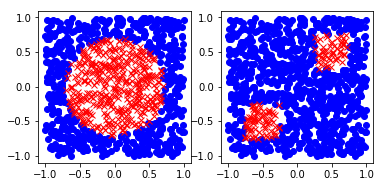

In [12]:
samples, labels = utils.load_data('data/data_4_1.npz')
plt.subplot(1, 2, 1)
utils.plot_data(samples, labels)
samples, labels = utils.load_data('data/data_4_2.npz')
plt.subplot(1, 2, 2)
utils.plot_data(samples, labels)

We want to use an MLP to correctly classify these data sets. Obviously, this is not possible using a single artificial neuron since the data are not linearly separable.

Try to let your MLP learn both structures as well as possible. How many hidden neurons and which learning rate are required in order to successfully classify each structure?

In [ ]:
hidden_neurons = 3
learning_rate = 0.01
epochs = 200
step_size = 2  # skip every 'step_size' step during animation

samples, labels = utils.load_data('data/data_4_1.npz')
weights = list(learn_mlp(samples, labels, hidden_neurons, learning_rate, epochs))
animation = utils.Animation(samples, labels, hidden_neurons)
animation.play(weights, step_size)